# Look at all the stars for which you do have RVs.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tqdm

import astropy.stats as aps

import aviary as av

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

(35328, 181)
(11050, 181)


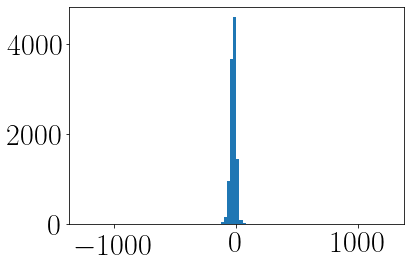

In [18]:
df = pd.read_csv("../../data/gaia_mc.csv")
gaia_mc = pd.read_csv("../../data/gaia_lamost_mc_velocities.csv")
gaia_mc = pd.read_csv("../../aviary/mc_san_gaia_lam.csv")
print(np.shape(gaia_mc))
m = (gaia_mc.rv.values != 0) * np.isfinite(gaia_mc.rv.values)
gaia_mc = gaia_mc.iloc[m]
print(np.shape(gaia_mc))

plt.hist(gaia_mc.rv.values, 100);

In [19]:
dt, dp = 500, .4

dispersions_bins = av.calc_dispersion_bins(gaia_mc.color_teffs.values,
                                               np.log10(gaia_mc.Prot.values),
                                               gaia_mc.vz.values,
#                                                gaia_mc.basic_vz.values,
                                               dt, dp)

 80%|████████  | 8850/11050 [00:02<00:00, 4252.06it/s]/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
100%|██████████| 11050/11050 [00:02<00:00, 4268.83it/s]


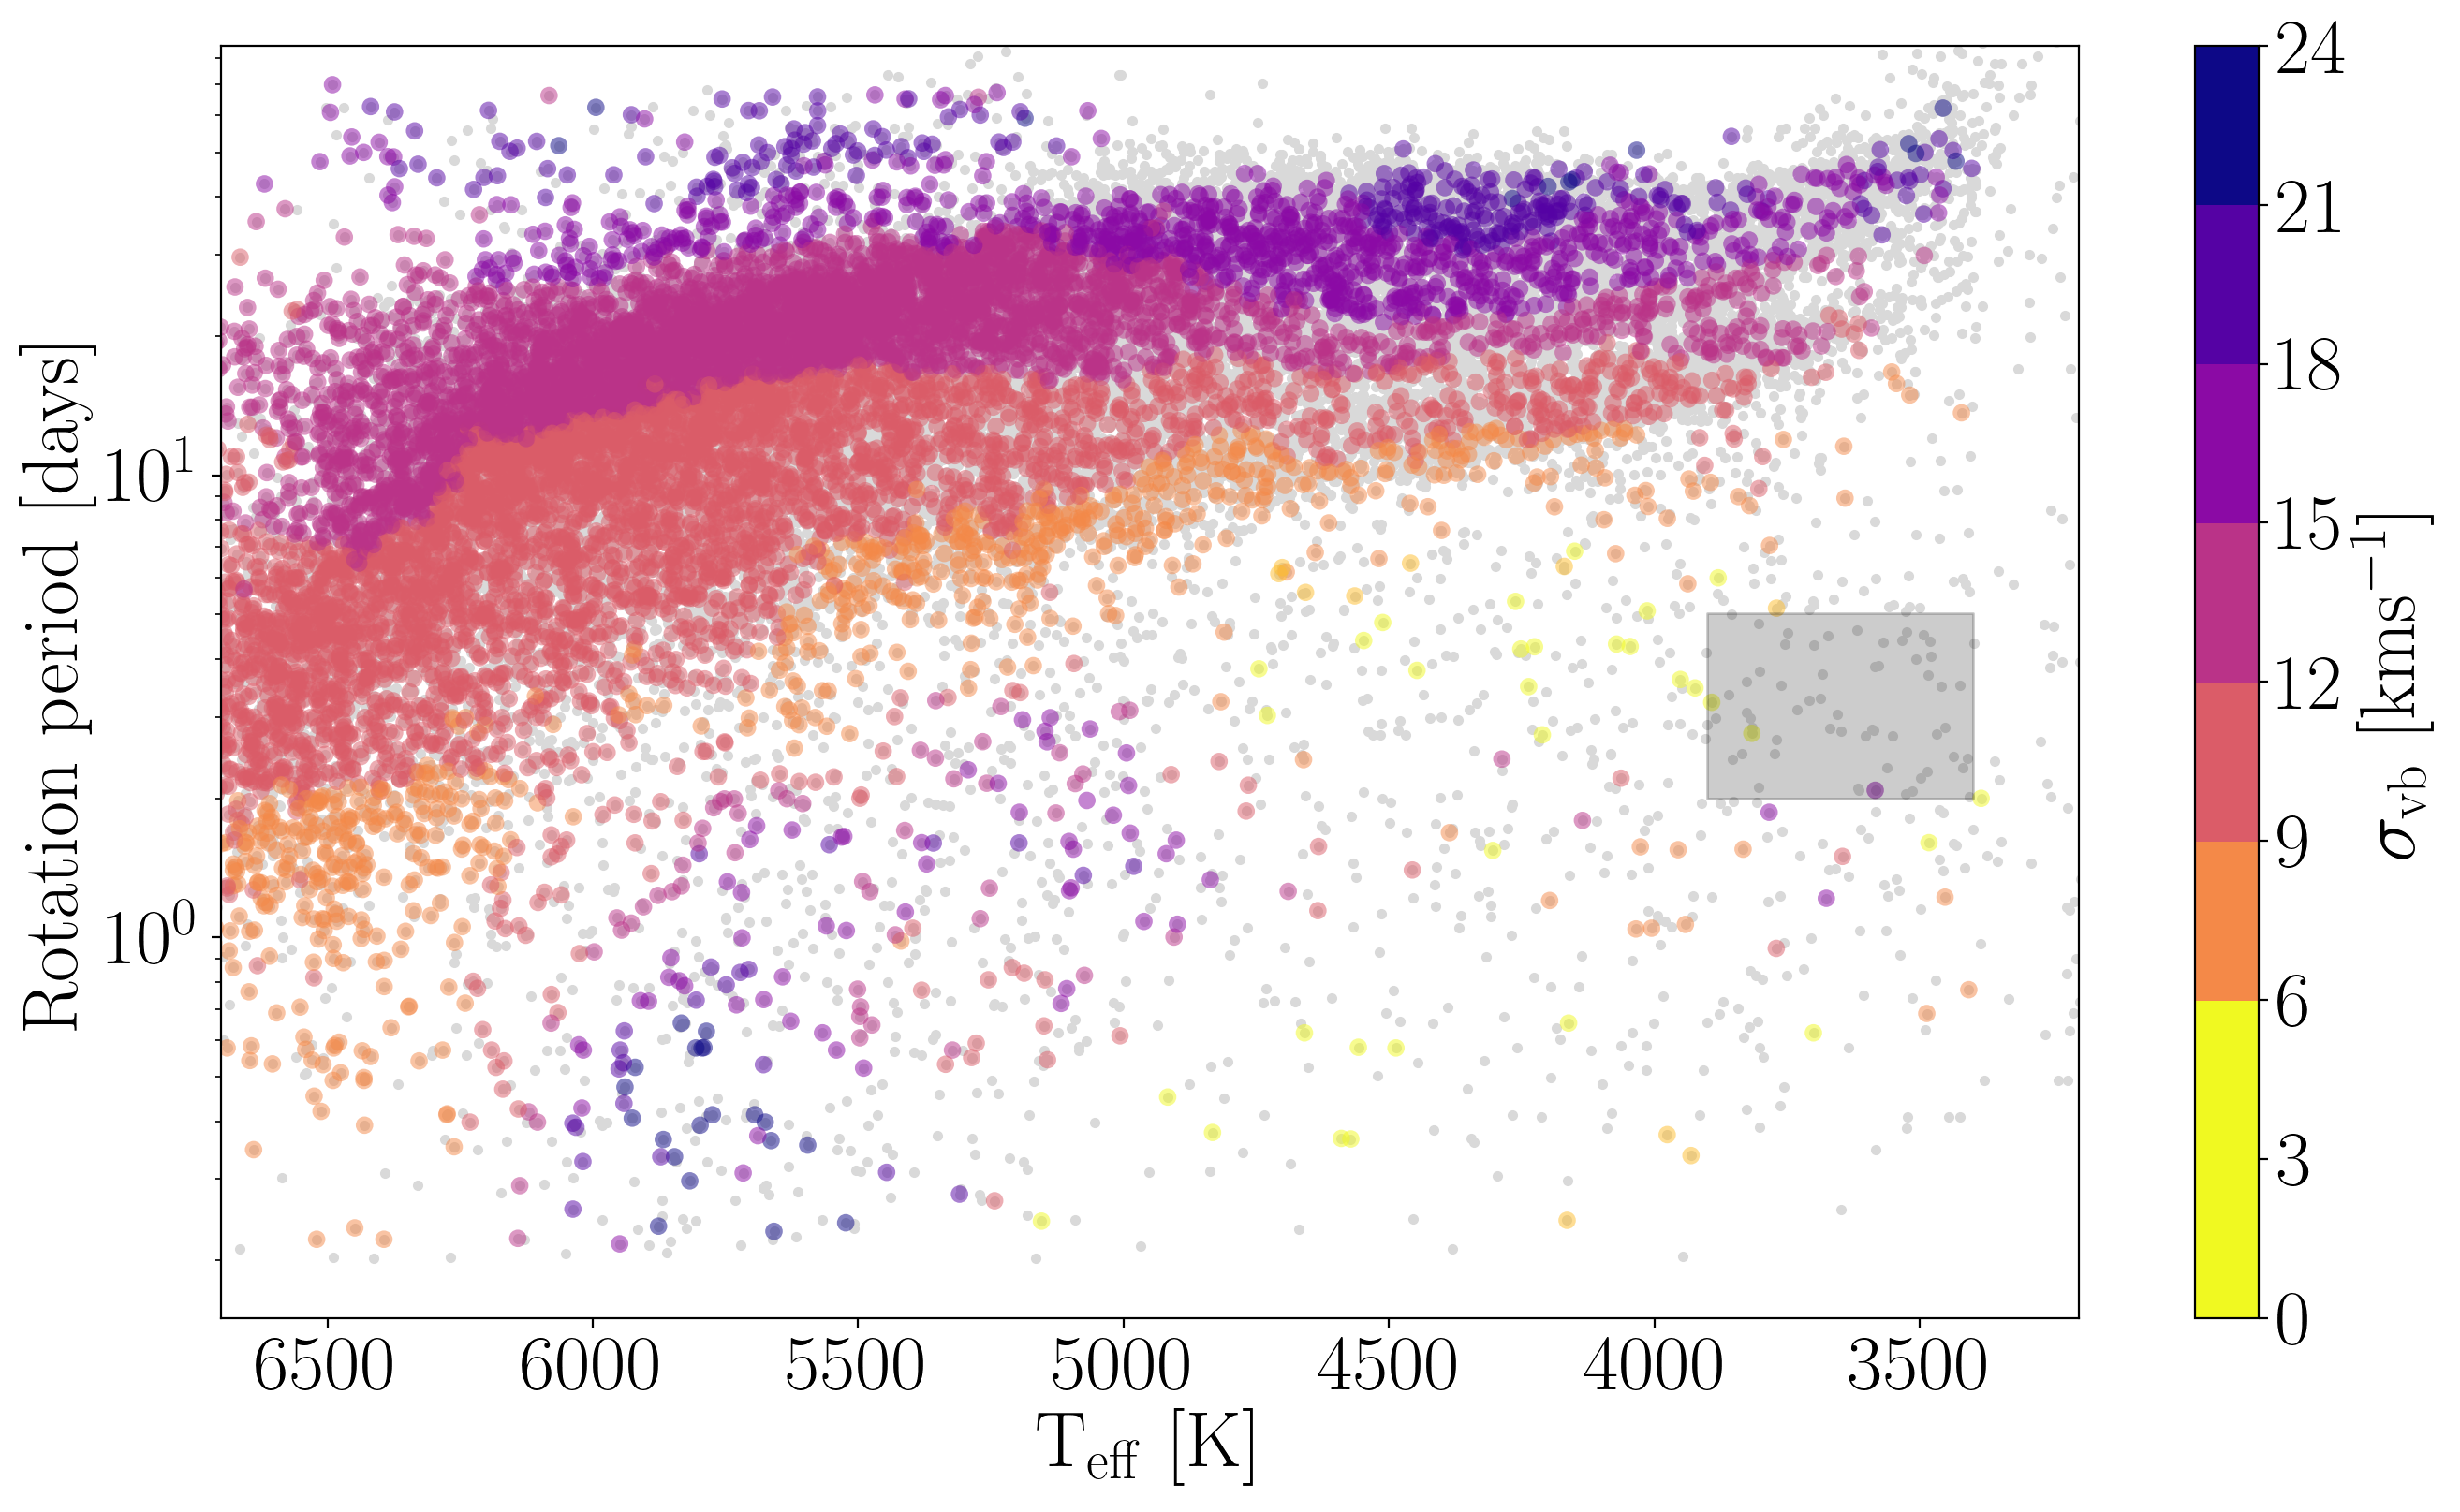

In [23]:
cmap = plt.cm.plasma_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9), dpi=200)

plt.plot(df.color_teffs, df.Prot, ".", color=".85", zorder=0, rasterized=True)
plt.scatter(gaia_mc.color_teffs, gaia_mc.Prot, c=dispersions_bins,
            s=45, alpha=.5, edgecolor="", vmin=5, vmax=22, cmap=cmap, norm=norm, zorder=1, rasterized=True)
plt.yscale("log")
plt.xlim(6550, 3200)
plt.xlabel("$\mathrm{T_{eff}~[K]}$")
plt.ylabel("$\mathrm{Rotation~period~[days]}$")

color_bar = plt.colorbar(label="$\mathrm{\sigma_{vb}~[kms^{-1}]}$")
color_bar.set_alpha(1)
color_bar.draw_all()

xs = np.arange(3000, 6000, dt)
ys = 10**np.arange(1, 2, dp)
    
xspot, yspot = 3400, 2
xs = np.linspace(xspot, xspot+dt, 100)
plt.fill_between(xs, yspot, 10**(np.log10(yspot) + dp), color="k", alpha=.2)

plt.ylim(.15, 85)
plt.xlim(6700, 3200)
plt.savefig("lamost_vplot")
plt.savefig("../../paper/existing_rvs.pdf")